In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
from sklearn import *
import sklearn
import numpy as np
import xgboost as xgb

/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are 

In [103]:
#help("modules")

### Reading Datasets

In [2]:
tr_variants_df = pd.read_csv("training_variants", index_col=False )
tst_variants_df = pd.read_csv("test_variants", index_col=False )

In [3]:
tr_text_df = pd.read_csv("training_text", delimiter= "\|\|", skiprows=1, 
                   engine = 'python', header = None, names = ["ID","Text"])

In [4]:
tst_text_df = pd.read_csv("test_text", delimiter= "\|\|", skiprows=1, 
                   engine = 'python', header = None, names = ["ID","Text"])

In [49]:
tr_text_df.head()

,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [50]:
tr_variants_df.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


### Ploting data

In [ ]:
plt.figure(1)
plt.subplot(221)
g = sns.countplot(x="Class", data=tr_variants_df)
plt.subplot(222)
sns.countplot(x="Gene", data=tr_variants_df)
plt.show()

### Merging datasets

In [51]:
train_df = pd.merge(tr_variants_df, tr_text_df, how='left', on='ID').fillna('')

In [52]:
test_df = pd.merge(tst_variants_df, tst_text_df, how='left', on='ID').fillna('')

In [53]:
train_df.head()

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [54]:
test_df.head()

,ID,Gene,Variation,Text
0,0,ACSL4,R570S,2. This mutation resulted in a myeloproliferat...
1,1,NAGLU,P521L,Abstract The Large Tumor Suppressor 1 (LATS1)...
2,2,PAH,L333F,Vascular endothelial growth factor receptor (V...
3,3,ING1,A148D,Inflammatory myofibroblastic tumor (IMT) is a ...
4,4,TMEM216,G77A,Abstract Retinoblastoma is a pediatric retina...


In [55]:
y = train_df['Class'].values
train = train_df.drop(['Class'], axis=1)

In [72]:
train_df.head()

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [76]:
#train_df.drop(['Class'], axis=1)

In [56]:
pid = test_df['ID'].values

In [57]:
df_all = pd.concat((train, test_df), axis=0, ignore_index=True)

In [58]:
df_all.head()

,ID,Gene,Variation,Text
0,0,FAM58A,Truncating Mutations,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,Oncogenic mutations in the monomeric Casitas B...


In [156]:
df_all['Gene_Share'] = df_all.apply(lambda r: sum([1 for w in r['Gene'].split(' ') 
                                                   if w in r['Text'].split(' ')]), axis=1)

In [157]:
df_all.head(50)

,ID,Gene,Variation,Text,Gene_Share
0,0,FAM58A,Truncating Mutations,Cyclin-dependent kinases (CDKs) regulate a var...,1
1,1,CBL,W802*,Abstract Background Non-small cell lung canc...,1
2,2,CBL,Q249E,Abstract Background Non-small cell lung canc...,1
3,3,CBL,N454D,Recent evidence has demonstrated that acquired...,1
4,4,CBL,L399V,Oncogenic mutations in the monomeric Casitas B...,1
5,5,CBL,V391I,Oncogenic mutations in the monomeric Casitas B...,1
6,6,CBL,V430M,Oncogenic mutations in the monomeric Casitas B...,1
7,7,CBL,Deletion,CBL is a negative regulator of activated recep...,1
8,8,CBL,Y371H,Abstract Juvenile myelomonocytic leukemia (JM...,1
9,9,CBL,C384R,Abstract Juvenile myelomonocytic leukemia (JM...,1


In [29]:
(df_all["Text"][2][len(df_all["Text"][2])-1000: len(df_all["Text"][2])],

SyntaxError: unexpected EOF while parsing (<ipython-input-29-8b9415cf079a>, line 1)

In [38]:
len(df_all["Text"][2])-5000

31691

In [44]:
df_all["Text"][2][len(df_all["Text"][2])-1000:len(df_all["Text"][2])]

'ver there was no preferential expression or mutations of the above genes in lung tumor samples of African-Americans. In this study, we show relatively high frequency of c-CBL mutations in lung cancers, especially in the large cell type among Caucasians and particularly among African-Americans. We therefore propose c-CBL as an efficacious target for lung cancers in African-Americans that needs to be further substantiated. This is all the more important because the prognosis for African-Americans with lung cancer, especially for men is much poorer compared to their Caucasian counterparts [41].  In conclusion, the results presented in this study demonstrate that c-CBL is frequently mutated or even lost in lung cancers. Our results support a role for c-CBL mutants that are independent of its ubiquitination activity. Given the relatively high mutation rates in c-CBL as well as RTKs such as MET and EGFR, it is likely that their combined effect could be synergistic in promoting tumorigenesis

In [59]:
df_all["Text"] = df_all["Text"].apply(lambda x: x[len(x)-1000:len(x)])

In [62]:
df_all["Text"][6]

' and activity of the wild-type CBL. According to a ratiometric method to identify driver genes in cancer (1), CBL can be regarded as an oncogene since it has several mutation hot spots. On the other hand, as shown in our study and in other studies, cancer driver mutations can inactivate the E3 activity of CBL, so it can also be regarded as a tumor suppressor. Although the latter fact complicates the development of CBL targeted therapies, understanding the delicate balance among different CBL-affected pathways may facilitate the indirect drug targeting of damaged CBL proteins. The current genetics-based frameworks to analyze cancer genome-wide sequence data are necessary but not sufficient for understanding the processes of carcinogenesis and developing informed, targeted therapies. Our approach, which can be applied in general to different proteins of interest, emphasizes the importance of the physics of binding and protein conformational ensembles in deducing the mechanisms of cancer

In [48]:
help(apply)

NameError: name 'apply' is not defined

In [158]:
df_all['Variation_Share'] = df_all.apply(lambda r: sum([1 for w in r['Variation'].upper().split(' ')
                                                        if w in r['Text'].upper().split(' ')]), axis=1)

In [159]:
df_all.head(50)

,ID,Gene,Variation,Text,Gene_Share,Variation_Share
0,0,FAM58A,Truncating Mutations,Cyclin-dependent kinases (CDKs) regulate a var...,1,1
1,1,CBL,W802*,Abstract Background Non-small cell lung canc...,1,1
2,2,CBL,Q249E,Abstract Background Non-small cell lung canc...,1,1
3,3,CBL,N454D,Recent evidence has demonstrated that acquired...,1,1
4,4,CBL,L399V,Oncogenic mutations in the monomeric Casitas B...,1,1
5,5,CBL,V391I,Oncogenic mutations in the monomeric Casitas B...,1,1
6,6,CBL,V430M,Oncogenic mutations in the monomeric Casitas B...,1,1
7,7,CBL,Deletion,CBL is a negative regulator of activated recep...,1,1
8,8,CBL,Y371H,Abstract Juvenile myelomonocytic leukemia (JM...,1,1
9,9,CBL,C384R,Abstract Juvenile myelomonocytic leukemia (JM...,1,1


In [60]:
df_all["Text"][23]

'Recent evidence has demonstrated that acquired uniparental disomy (aUPD) is a novel mechanism by which pathogenetic mutations in cancer may be reduced to homozygosity. To help identify novel mutations in myeloproliferative neoplasms (MPNs), we performed a genome-wide single nucleotide polymorphism (SNP) screen to identify aUPD in 58 patients with atypical chronic myeloid leukemia (aCML; n = 30), JAK2 mutation–negative myelofibrosis (MF; n = 18), or JAK2 mutation–negative polycythemia vera (PV; n = 10). Stretches of homozygous, copy neutral SNP calls greater than 20Mb were seen in 10 (33%) aCML and 1 (6%) MF, but were absent in PV. In total, 7 different chromosomes were involved with 7q and 11q each affected in 10% of aCML cases. CBL mutations were identified in all 3 cases with 11q aUPD and analysis of 574 additional MPNs revealed a total of 27 CBL variants in 26 patients with aCML, myelofibrosis or chronic myelomonocytic leukemia. Most variants were missense substitutions in the RING

In [63]:
gen_var_lst = sorted(list(train.Gene.unique()) + list(train.Variation.unique()))
print(len(gen_var_lst))

3260


In [64]:
list(train.Gene.unique()) + list(train.Variation.unique())

['FAM58A',
 'CBL',
 'SHOC2',
 'TERT',
 'DICER1',
 'PTPRT',
 'RHEB',
 'SHQ1',
 'CCND2',
 'RAD50',
 'CCND3',
 'RIT1',
 'CCNE1',
 'RYBP',
 'TGFBR1',
 'TGFBR2',
 'MSH6',
 'KMT2D',
 'LATS1',
 'PBRM1',
 'SF3B1',
 'LATS2',
 'EGFR',
 'NKX2-1',
 'EIF1AX',
 'ARID2',
 'BRD4',
 'HIST1H1C',
 'ERRFI1',
 'CHEK2',
 'PAK1',
 'TMPRSS2',
 'H3F3A',
 'ELF3',
 'ROS1',
 'ASXL2',
 'CDH1',
 'EPCAM',
 'EP300',
 'EPAS1',
 'TP53',
 'TP53BP1',
 'SMAD2',
 'SMAD3',
 'SMAD4',
 'CDK4',
 'AURKB',
 'CDK6',
 'FBXW7',
 'CDK8',
 'CDKN1A',
 'CDKN1B',
 'CDKN2A',
 'CDKN2B',
 'CDKN2C',
 'ASXL1',
 'ERBB2',
 'ERBB3',
 'ERBB4',
 'ERCC2',
 'BRIP1',
 'ERCC3',
 'ERCC4',
 'ABL1',
 'CEBPA',
 'ERG',
 'HLA-A',
 'HLA-B',
 'PDGFRA',
 'PDGFRB',
 'RBM10',
 'KDM5C',
 'ESR1',
 'ETV1',
 'ETV6',
 'TSC1',
 'IKZF1',
 'TSC2',
 'EWSR1',
 'ACVR1',
 'FOXA1',
 'MDM2',
 'ARID1A',
 'EZH2',
 'MDM4',
 'KLF4',
 'RXRA',
 'MAP3K1',
 'AXIN1',
 'BAP1',
 'MEN1',
 'FANCA',
 'FANCC',
 'MET',
 'U2AF1',
 'KMT2C',
 'FAT1',
 'ARID1B',
 'PIK3CA',
 'PIK3CB',
 'PIM1',
 

In [67]:
gen_var_lst[1:10]

['2010_2471trunc',
 '256_286trunc',
 "3' Deletion",
 '385_418del',
 '422_605trunc',
 '533_534del',
 '534_536del',
 '550_592del',
 '560_561insER']

In [15]:
gen_var_lst = [x for x in gen_var_lst if len(x.split(' '))==1]
print(len(gen_var_lst))

3091


In [70]:
gen_var_lst[1:10]

['2010_2471trunc',
 '256_286trunc',
 '385_418del',
 '422_605trunc',
 '533_534del',
 '534_536del',
 '550_592del',
 '560_561insER',
 '596_619splice']

In [164]:
i_ = 0
#commented for Kaggle Limits
for gen_var_lst_itm in gen_var_lst:
    if i_ % 100 == 0: print(i_)
    df_all['GV_'+str(gen_var_lst_itm)] 
    = df_all['Text'].map(lambda x: str(x).count(str(gen_var_lst_itm)))
    i_ += 1




0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000


In [65]:
"""for c in df_all.columns:
    if df_all[c].dtype == 'object':
        if c in ['Gene','Variation']:
            lbl = preprocessing.LabelEncoder()
            df_all[c+'_lbl_enc'] = lbl.fit_transform(df_all[c].values)  
            df_all[c+'_len'] = df_all[c].map(lambda x: len(str(x)))
            df_all[c+'_words'] = df_all[c].map(lambda x: len(str(x).split(' ')))
        elif c != 'Text':
            lbl = preprocessing.LabelEncoder()
            df_all[c] = lbl.fit_transform(df_all[c].values)
        if c=='Text': 
            df_all[c+'_len'] = df_all[c].map(lambda x: len(str(x)))
            df_all[c+'_words'] = df_all[c].map(lambda x: len(str(x).split(' '))) """

train = df_all.iloc[:len(train)]
test = df_all.iloc[len(train):]

class cust_regression_vals(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin):
    def fit(self, x, y=None):
        return self
    def transform(self, x):
        x = x.drop(['Gene', 'Variation','ID','Text'],axis=1).values
        return x

class cust_txt_col(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin):
    def __init__(self, key):
        self.key = key
    def fit(self, x, y=None):
        return self
    def transform(self, x):
        return x[self.key].apply(str)

In [66]:
df_all.shape

(8989, 4)

In [67]:
y

array([1, 2, 2, ..., 1, 4, 4])

In [78]:
print('Pipeline...')
fp = pipeline.Pipeline([ #Setting paramenters
    ('union', pipeline.FeatureUnion(
        n_jobs = -1,
        transformer_list = [
            ('standard', cust_regression_vals()),
            ('pi1', pipeline.Pipeline([('Gene', cust_txt_col('Gene')), ('count_Gene',
                                                                        feature_extraction.text.CountVectorizer
                                                                        (analyzer=u'char', ngram_range=(1, 8))), 
                                       ('tsvd1', decomposition.TruncatedSVD(n_components=50, n_iter=25, random_state=12))])),
            ('pi2', pipeline.Pipeline([('Variation', cust_txt_col('Variation')),
                                       ('count_Variation', feature_extraction.text.CountVectorizer
                                        (analyzer=u'char', ngram_range=(1, 8))), 
                                       ('tsvd2', decomposition.TruncatedSVD(n_components=50, n_iter=25, random_state=12))])),
            #commented for Kaggle Limits
            ('pi3', pipeline.Pipeline([('Text', cust_txt_col('Text')), ('tfidf_Text',
                                                                        feature_extraction.text.TfidfVectorizer(ngram_range=(1, 2))), 
                                       ('tsvd3', decomposition.TruncatedSVD(n_components=100, n_iter=25, random_state=12))]))
        ])
    )])

train = fp.fit_transform(train); print(train.shape)
test = fp.transform(test); print(test.shape)



Pipeline...


JoblibAttributeError: JoblibAttributeError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/runpy.py in _run_module_as_main(mod_name='ipykernel.__main__', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.5/site-packages/ipykernel/__main__.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/runpy.py in _run_code(code=<code object <module> at 0x1015f1150, file "/Use...3.5/site-packages/ipykernel/__main__.py", line 1>, run_globals={'__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/navdeeppal/anaconda/envs/py35/lib/python3...ges/ipykernel/__pycache__/__main__.cpython-35.pyc', '__doc__': None, '__file__': '/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': 'ipykernel', '__spec__': ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.5/site-packages/ipykernel/__main__.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/navde.../python3.5/site-packages/ipykernel/kernelapp.py'>}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.5/site-packages/ipykernel/__main__.py'), pkg_name='ipykernel', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x1015f1150, file "/Use...3.5/site-packages/ipykernel/__main__.py", line 1>
        run_globals = {'__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/navdeeppal/anaconda/envs/py35/lib/python3...ges/ipykernel/__pycache__/__main__.cpython-35.pyc', '__doc__': None, '__file__': '/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': 'ipykernel', '__spec__': ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.5/site-packages/ipykernel/__main__.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/navde.../python3.5/site-packages/ipykernel/kernelapp.py'>}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py in <module>()
      1 if __name__ == '__main__':
      2     from ipykernel import kernelapp as app
----> 3     app.launch_new_instance()

...........................................................................
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    587         
    588         If a global instance already exists, this reinitializes and starts it
    589         """
    590         app = cls.instance(**kwargs)
    591         app.initialize(argv)
--> 592         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    593 
    594 #-----------------------------------------------------------------------------
    595 # utility functions, for convenience
    596 #-----------------------------------------------------------------------------

...........................................................................
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    398         
    399         if self.poller is not None:
    400             self.poller.start()
    401         self.kernel.start()
    402         try:
--> 403             ioloop.IOLoop.instance().start()
    404         except KeyboardInterrupt:
    405             pass
    406 
    407 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    146             PollIOLoop.configure(ZMQIOLoop)
    147         return PollIOLoop.instance()
    148     
    149     def start(self):
    150         try:
--> 151             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    152         except ZMQError as e:
    153             if e.errno == ETERM:
    154                 # quietly return on ETERM
    155                 pass

...........................................................................
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    805                         self._timeouts = [x for x in self._timeouts
    806                                           if x.callback is not None]
    807                         heapq.heapify(self._timeouts)
    808 
    809                 for callback in callbacks:
--> 810                     self._run_callback(callback)
        self._run_callback = <bound method IOLoop._run_callback of <zmq.eventloop.ioloop.ZMQIOLoop object>>
        callback = functools.partial(<function wrap.<locals>.null_wrapper at 0x10a10e0d0>)
    811                 for timeout in due_timeouts:
    812                     if timeout.callback is not None:
    813                         self._run_callback(timeout.callback)
    814                 # Closures may be holding on to a lot of memory, so allow

...........................................................................
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/tornado/ioloop.py in _run_callback(self=<zmq.eventloop.ioloop.ZMQIOLoop object>, callback=functools.partial(<function wrap.<locals>.null_wrapper at 0x10a10e0d0>))
    587         """Runs a callback with error handling.
    588 
    589         For use in subclasses.
    590         """
    591         try:
--> 592             ret = callback()
        ret = undefined
        callback = functools.partial(<function wrap.<locals>.null_wrapper at 0x10a10e0d0>)
    593             if ret is not None and is_future(ret):
    594                 # Functions that return Futures typically swallow all
    595                 # exceptions and store them in the Future.  If a Future
    596                 # makes it out to the IOLoop, ensure its exception (if any)

...........................................................................
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/tornado/stack_context.py in null_wrapper(*args=(), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = ()
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/kernelbase.py in enter_eventloop(self=<ipykernel.ipkernel.IPythonKernel object>)
    237             stream.flush(zmq.POLLOUT)
    238         # restore default_int_handler
    239         signal(SIGINT, default_int_handler)
    240         while self.eventloop is not None:
    241             try:
--> 242                 self.eventloop(self)
        self.eventloop = None
        self = <ipykernel.ipkernel.IPythonKernel object>
    243             except KeyboardInterrupt:
    244                 # Ctrl-C shouldn't crash the kernel
    245                 self.log.error("KeyboardInterrupt caught in kernel")
    246                 continue

...........................................................................
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/eventloops.py in loop_cocoa(kernel=<ipykernel.ipkernel.IPythonKernel object>)
    236             # double nested try/except, to properly catch KeyboardInterrupt
    237             # due to pyzmq Issue #130
    238             try:
    239                 # don't let interrupts during mainloop invoke crash_handler:
    240                 sys.excepthook = handle_int
--> 241                 show.mainloop()
        show.mainloop = <bound method Show.mainloop of <matplotlib.backends.backend_macosx.Show object>>
    242                 sys.excepthook = real_excepthook
    243                 # use poller if mainloop returned (no windows)
    244                 # scale by extra factor of 10, since it's a real poll
    245                 poller.poll(10*poll_interval)

...........................................................................
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/backends/backend_macosx.py in mainloop(self=<matplotlib.backends.backend_macosx.Show object>)
     21 from .backend_agg import RendererAgg, FigureCanvasAgg
     22 
     23 
     24 class Show(ShowBase):
     25     def mainloop(self):
---> 26         _macosx.show()
     27 show = Show()
     28 
     29 
     30 ########################################################################

...........................................................................
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/backend_bases.py in _on_timer(self=Timer object 0x10f9a9d08 wrapping CFRunLoopTimerRef 0x7feffa5389f0)
   1314         Runs all function that have been registered as callbacks. Functions
   1315         can return False (or 0) if they should not be called any more. If there
   1316         are no callbacks, the timer is automatically stopped.
   1317         '''
   1318         for func, args, kwargs in self.callbacks:
-> 1319             ret = func(*args, **kwargs)
        ret = undefined
        func = <function loop_cocoa.<locals>.doi>
        args = ()
        kwargs = {}
   1320             # docstring above explains why we use `if ret == False` here,
   1321             # instead of `if not ret`.
   1322             if ret == False:
   1323                 self.callbacks.remove((func, args, kwargs))

...........................................................................
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/eventloops.py in doi()
    213 
    214     # add doi() as a Timer to the CFRunLoop
    215     def doi():
    216         # restore excepthook during IPython code
    217         sys.excepthook = real_excepthook
--> 218         kernel.do_one_iteration()
    219         # and back:
    220         sys.excepthook = handle_int
    221 
    222     t = TimerMac(poll_interval)

...........................................................................
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/kernelbase.py in do_one_iteration(self=<ipykernel.ipkernel.IPythonKernel object>)
    270         """step eventloop just once"""
    271         if self.control_stream:
    272             self.control_stream.flush()
    273         for stream in self.shell_streams:
    274             # handle at most one request per iteration
--> 275             stream.flush(zmq.POLLIN, 1)
        stream.flush = <bound method ZMQStream.flush of <zmq.eventloop.zmqstream.ZMQStream object>>
    276             stream.flush(zmq.POLLOUT)
    277 
    278 
    279     def record_ports(self, ports):

...........................................................................
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py in flush(self=<zmq.eventloop.zmqstream.ZMQStream object>, flag=1, limit=1)
    340         self.poller.register(self.socket, flag)
    341         events = self.poller.poll(0)
    342         while events and (not limit or count < limit):
    343             s,event = events[0]
    344             if event & zmq.POLLIN: # receiving
--> 345                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    346                 count += 1
    347                 if self.socket is None:
    348                     # break if socket was closed during callback
    349                     break

...........................................................................
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    460                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    461         else:
    462             if self._recv_callback:
    463                 callback = self._recv_callback
    464                 # self._recv_callback = None
--> 465                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    466                 
    467         # self.update_state()
    468         
    469 

...........................................................................
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    402         close our socket."""
    403         try:
    404             # Use a NullContext to ensure that all StackContexts are run
    405             # inside our blanket exception handler rather than outside.
    406             with stack_context.NullContext():
--> 407                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    408         except:
    409             gen_log.error("Uncaught exception, closing connection.",
    410                           exc_info=True)
    411             # Close the socket on an uncaught exception from a user callback

...........................................................................
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    255         if self.control_stream:
    256             self.control_stream.on_recv(self.dispatch_control, copy=False)
    257 
    258         def make_dispatcher(stream):
    259             def dispatcher(msg):
--> 260                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    261             return dispatcher
    262 
    263         for s in self.shell_streams:
    264             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "print('Pipeline...')\nfp = pipeline.Pipeline([ #S...e)\ntest = fp.transform(test); print(test.shape)\n\n", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2017-09-02T01:13:21.502231', 'msg_id': '86870FA4E1714CCA80BFB37C4BB6463F', 'msg_type': 'execute_request', 'session': 'D417D5ABC1D34B7F88EDEFC36A4FBA35', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '86870FA4E1714CCA80BFB37C4BB6463F', 'msg_type': 'execute_request', 'parent_header': {}})
    207             self.log.error("UNKNOWN MESSAGE TYPE: %r", msg_type)
    208         else:
    209             self.log.debug("%s: %s", msg_type, msg)
    210             self.pre_handler_hook()
    211             try:
--> 212                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'D417D5ABC1D34B7F88EDEFC36A4FBA35']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "print('Pipeline...')\nfp = pipeline.Pipeline([ #S...e)\ntest = fp.transform(test); print(test.shape)\n\n", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2017-09-02T01:13:21.502231', 'msg_id': '86870FA4E1714CCA80BFB37C4BB6463F', 'msg_type': 'execute_request', 'session': 'D417D5ABC1D34B7F88EDEFC36A4FBA35', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '86870FA4E1714CCA80BFB37C4BB6463F', 'msg_type': 'execute_request', 'parent_header': {}}
    213             except Exception:
    214                 self.log.error("Exception in message handler:", exc_info=True)
    215             finally:
    216                 self.post_handler_hook()

...........................................................................
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'D417D5ABC1D34B7F88EDEFC36A4FBA35'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "print('Pipeline...')\nfp = pipeline.Pipeline([ #S...e)\ntest = fp.transform(test); print(test.shape)\n\n", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2017-09-02T01:13:21.502231', 'msg_id': '86870FA4E1714CCA80BFB37C4BB6463F', 'msg_type': 'execute_request', 'session': 'D417D5ABC1D34B7F88EDEFC36A4FBA35', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '86870FA4E1714CCA80BFB37C4BB6463F', 'msg_type': 'execute_request', 'parent_header': {}})
    365         if not silent:
    366             self.execution_count += 1
    367             self._publish_execute_input(code, parent, self.execution_count)
    368 
    369         reply_content = self.do_execute(code, silent, store_history,
--> 370                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    371 
    372         # Flush output before sending the reply.
    373         sys.stdout.flush()
    374         sys.stderr.flush()

...........................................................................
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code="print('Pipeline...')\nfp = pipeline.Pipeline([ #S...e)\ntest = fp.transform(test); print(test.shape)\n\n", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    170 
    171         reply_content = {}
    172         # FIXME: the shell calls the exception handler itself.
    173         shell._reply_content = None
    174         try:
--> 175             shell.run_cell(code, store_history=store_history, silent=silent)
        shell.run_cell = <bound method InteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = "print('Pipeline...')\nfp = pipeline.Pipeline([ #S...e)\ntest = fp.transform(test); print(test.shape)\n\n"
        store_history = True
        silent = False
    176         except:
    177             status = u'error'
    178             # FIXME: this code right now isn't being used yet by default,
    179             # because the run_cell() call above directly fires off exception

...........................................................................
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="print('Pipeline...')\nfp = pipeline.Pipeline([ #S...e)\ntest = fp.transform(test); print(test.shape)\n\n", store_history=True, silent=False, shell_futures=True)
   2897                 self.displayhook.exec_result = result
   2898 
   2899                 # Execute the user code
   2900                 interactivity = "none" if silent else self.ast_node_interactivity
   2901                 self.run_ast_nodes(code_ast.body, cell_name,
-> 2902                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2903 
   2904                 # Reset this so later displayed values do not modify the
   2905                 # ExecutionResult
   2906                 self.displayhook.exec_result = None

...........................................................................
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.Expr object>], cell_name='<ipython-input-78-f232738878f9>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<IPython.core.interactiveshell.ExecutionResult object>)
   3001 
   3002         try:
   3003             for i, node in enumerate(to_run_exec):
   3004                 mod = ast.Module([node])
   3005                 code = compiler(mod, cell_name, "exec")
-> 3006                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x10f9a5f60, file "<ipython-input-78-f232738878f9>", line 22>
        result = <IPython.core.interactiveshell.ExecutionResult object>
   3007                     return True
   3008 
   3009             for i, node in enumerate(to_run_interactive):
   3010                 mod = ast.Interactive([node])

...........................................................................
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x10f9a5f60, file "<ipython-input-78-f232738878f9>", line 22>, result=<IPython.core.interactiveshell.ExecutionResult object>)
   3061         outflag = 1  # happens in more places, so it's easier as default
   3062         try:
   3063             try:
   3064                 self.hooks.pre_run_code_hook()
   3065                 #rprint('Running code', repr(code_obj)) # dbg
-> 3066                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x10f9a5f60, file "<ipython-input-78-f232738878f9>", line 22>
        self.user_global_ns = {'In': ['', 'import csv\nimport pandas as pd\nimport matplotlib... sklearn\nimport numpy as np\nimport xgboost as xgb', 'tr_variants_df = pd.read_csv("training_variants"... = pd.read_csv("test_variants", index_col=False )', 'tr_text_df = pd.read_csv("training_text", delimi...= \'python\', header = None, names = ["ID","Text"])', 'tst_text_df = pd.read_csv("test_text", delimiter...= \'python\', header = None, names = ["ID","Text"])', "train_df = pd.merge(tr_variants_df, tr_text_df, how='left', on='ID').fillna('')", "test_df = pd.merge(tst_variants_df, tst_text_df, how='left', on='ID').fillna('')", 'train_df.head()', "y = train_df['Class'].values\ntrain = train_df.drop(['Class'], axis=1)", 'y', "pid = test_df['ID'].values", 'df_all = pd.concat((train, test_df), axis=0, ignore_index=True)', 'df_all.head()', 'gen_var_lst = sorted(list(train.Gene.unique()) +...rain.Variation.unique()))\nprint(len(gen_var_lst))', 'list(train.Gene.unique()) + list(train.Variation.unique())', "gen_var_lst = [x for x in gen_var_lst if len(x.split(' '))==1]\nprint(len(gen_var_lst))", 'for c in df_all.columns:\n    if df_all[c].dtype ...m(self, x):\n        return x[self.key].apply(str)', 'df_all.shape', "print('Pipeline...')\nfp = pipeline.Pipeline([ #S...ape)\ntest = fp.transform(test); print(test.shape)", "pipeline.Pipeline([('Gene', cust_txt_col('Gene')...D(n_components=20, n_iter=25, random_state=12))])", ...], 'Out': {7:    ID    Gene             Variation  Class  \
0 ...cogenic mutations in the monomeric Casitas B...  , 9: array([1, 2, 2, ..., 1, 4, 4]), 12:    ID    Gene             Variation  \
0   0  FA...cogenic mutations in the monomeric Casitas B...  , 14: ['FAM58A', 'CBL', 'SHOC2', 'TERT', 'DICER1', 'PTPRT', 'RHEB', 'SHQ1', 'CCND2', 'RAD50', 'CCND3', 'RIT1', 'CCNE1', 'RYBP', 'TGFBR1', 'TGFBR2', 'MSH6', 'KMT2D', 'LATS1', 'PBRM1', ...], 17: (8989, 12), 19: Pipeline(memory=None,
     steps=[('Gene', cust_...0, n_iter=25,
       random_state=12, tol=0.0))]), 20: array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 24: ' Abstract Background  Non-small cell lung cancer... could be synergistic in promoting tumorigenesis.', 25: ' Abstract Background  Non-small cell lung cancer... could be synergistic in promoting tumorigenesis.', 30: 36691, ...}, '_':         ID    Gene             Variation  \
0   ... associated with le...  

[3321 rows x 4 columns], '_12':    ID    Gene             Variation  \
0   0  FA...cogenic mutations in the monomeric Casitas B...  , '_14': ['FAM58A', 'CBL', 'SHOC2', 'TERT', 'DICER1', 'PTPRT', 'RHEB', 'SHQ1', 'CCND2', 'RAD50', 'CCND3', 'RIT1', 'CCNE1', 'RYBP', 'TGFBR1', 'TGFBR2', 'MSH6', 'KMT2D', 'LATS1', 'PBRM1', ...], '_17': (8989, 12), '_19': Pipeline(memory=None,
     steps=[('Gene', cust_...0, n_iter=25,
       random_state=12, tol=0.0))]), '_20': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), '_24': ' Abstract Background  Non-small cell lung cancer... could be synergistic in promoting tumorigenesis.', '_25': ' Abstract Background  Non-small cell lung cancer... could be synergistic in promoting tumorigenesis.', ...}
        self.user_ns = {'In': ['', 'import csv\nimport pandas as pd\nimport matplotlib... sklearn\nimport numpy as np\nimport xgboost as xgb', 'tr_variants_df = pd.read_csv("training_variants"... = pd.read_csv("test_variants", index_col=False )', 'tr_text_df = pd.read_csv("training_text", delimi...= \'python\', header = None, names = ["ID","Text"])', 'tst_text_df = pd.read_csv("test_text", delimiter...= \'python\', header = None, names = ["ID","Text"])', "train_df = pd.merge(tr_variants_df, tr_text_df, how='left', on='ID').fillna('')", "test_df = pd.merge(tst_variants_df, tst_text_df, how='left', on='ID').fillna('')", 'train_df.head()', "y = train_df['Class'].values\ntrain = train_df.drop(['Class'], axis=1)", 'y', "pid = test_df['ID'].values", 'df_all = pd.concat((train, test_df), axis=0, ignore_index=True)', 'df_all.head()', 'gen_var_lst = sorted(list(train.Gene.unique()) +...rain.Variation.unique()))\nprint(len(gen_var_lst))', 'list(train.Gene.unique()) + list(train.Variation.unique())', "gen_var_lst = [x for x in gen_var_lst if len(x.split(' '))==1]\nprint(len(gen_var_lst))", 'for c in df_all.columns:\n    if df_all[c].dtype ...m(self, x):\n        return x[self.key].apply(str)', 'df_all.shape', "print('Pipeline...')\nfp = pipeline.Pipeline([ #S...ape)\ntest = fp.transform(test); print(test.shape)", "pipeline.Pipeline([('Gene', cust_txt_col('Gene')...D(n_components=20, n_iter=25, random_state=12))])", ...], 'Out': {7:    ID    Gene             Variation  Class  \
0 ...cogenic mutations in the monomeric Casitas B...  , 9: array([1, 2, 2, ..., 1, 4, 4]), 12:    ID    Gene             Variation  \
0   0  FA...cogenic mutations in the monomeric Casitas B...  , 14: ['FAM58A', 'CBL', 'SHOC2', 'TERT', 'DICER1', 'PTPRT', 'RHEB', 'SHQ1', 'CCND2', 'RAD50', 'CCND3', 'RIT1', 'CCNE1', 'RYBP', 'TGFBR1', 'TGFBR2', 'MSH6', 'KMT2D', 'LATS1', 'PBRM1', ...], 17: (8989, 12), 19: Pipeline(memory=None,
     steps=[('Gene', cust_...0, n_iter=25,
       random_state=12, tol=0.0))]), 20: array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 24: ' Abstract Background  Non-small cell lung cancer... could be synergistic in promoting tumorigenesis.', 25: ' Abstract Background  Non-small cell lung cancer... could be synergistic in promoting tumorigenesis.', 30: 36691, ...}, '_':         ID    Gene             Variation  \
0   ... associated with le...  

[3321 rows x 4 columns], '_12':    ID    Gene             Variation  \
0   0  FA...cogenic mutations in the monomeric Casitas B...  , '_14': ['FAM58A', 'CBL', 'SHOC2', 'TERT', 'DICER1', 'PTPRT', 'RHEB', 'SHQ1', 'CCND2', 'RAD50', 'CCND3', 'RIT1', 'CCNE1', 'RYBP', 'TGFBR1', 'TGFBR2', 'MSH6', 'KMT2D', 'LATS1', 'PBRM1', ...], '_17': (8989, 12), '_19': Pipeline(memory=None,
     steps=[('Gene', cust_...0, n_iter=25,
       random_state=12, tol=0.0))]), '_20': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), '_24': ' Abstract Background  Non-small cell lung cancer... could be synergistic in promoting tumorigenesis.', '_25': ' Abstract Background  Non-small cell lung cancer... could be synergistic in promoting tumorigenesis.', ...}
   3067             finally:
   3068                 # Reset our crash handler in place
   3069                 sys.excepthook = old_excepthook
   3070         except SystemExit as e:

...........................................................................
/Volumes/MACINTOSH EXTENDED/Kaggle/PersonalMed/<ipython-input-78-f232738878f9> in <module>()
     17                                                                         feature_extraction.text.TfidfVectorizer(ngram_range=(1, 2))), 
     18                                        ('tsvd3', decomposition.TruncatedSVD(n_components=100, n_iter=25, random_state=12))]))
     19         ])
     20     )])
     21 
---> 22 train = fp.fit_transform(train); print(train.shape)
     23 test = fp.transform(test); print(test.shape)
     24 

...........................................................................
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/pipeline.py in fit_transform(self=Pipeline(memory=None,
     steps=[('union', Feat...ol=0.0))]))],
       transformer_weights=None))]), X=array([[  8.99252031e-01,   4.65372024e-01,   8....246224e-03,  -7.29936064e-04,  -1.57824951e-02]]), y=None, **fit_params={})
    287             Transformed samples
    288         """
    289         last_step = self._final_estimator
    290         Xt, fit_params = self._fit(X, y, **fit_params)
    291         if hasattr(last_step, 'fit_transform'):
--> 292             return last_step.fit_transform(Xt, y, **fit_params)
        last_step.fit_transform = <bound method FeatureUnion.fit_transform of Feat... tol=0.0))]))],
       transformer_weights=None)>
        Xt = array([[  8.99252031e-01,   4.65372024e-01,   8....246224e-03,  -7.29936064e-04,  -1.57824951e-02]])
        y = None
        fit_params = {}
    293         elif last_step is None:
    294             return Xt
    295         else:
    296             return last_step.fit(Xt, y, **fit_params).transform(Xt)

...........................................................................
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/pipeline.py in fit_transform(self=FeatureUnion(n_jobs=-1,
       transformer_list=..., tol=0.0))]))],
       transformer_weights=None), X=array([[  8.99252031e-01,   4.65372024e-01,   8....246224e-03,  -7.29936064e-04,  -1.57824951e-02]]), y=None, **fit_params={})
    741         """
    742         self._validate_transformers()
    743         result = Parallel(n_jobs=self.n_jobs)(
    744             delayed(_fit_transform_one)(trans, weight, X, y,
    745                                         **fit_params)
--> 746             for name, trans, weight in self._iter())
        self._iter = <bound method FeatureUnion._iter of FeatureUnion... tol=0.0))]))],
       transformer_weights=None)>
    747 
    748         if not result:
    749             # All transformers are None
    750             return np.zeros((X.shape[0], 0))

...........................................................................
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object FeatureUnion.fit_transform.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
AttributeError                                     Sat Sep  2 01:13:21 2017
PID: 25650    Python 3.5.4: /Users/navdeeppal/anaconda/envs/py35/bin/python
...........................................................................
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_transform_one>, (cust_regression_vals(), None, memmap([[  8.99252031e-01,   4.65372024e-01,   8...246224e-03,  -7.29936064e-04,  -1.57824951e-02]]), None), {})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_transform_one>
        args = (cust_regression_vals(), None, memmap([[  8.99252031e-01,   4.65372024e-01,   8...246224e-03,  -7.29936064e-04,  -1.57824951e-02]]), None)
        kwargs = {}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/pipeline.py in _fit_transform_one(transformer=cust_regression_vals(), weight=None, X=memmap([[  8.99252031e-01,   4.65372024e-01,   8...246224e-03,  -7.29936064e-04,  -1.57824951e-02]]), y=None, **fit_params={})
    584 
    585 
    586 def _fit_transform_one(transformer, weight, X, y,
    587                        **fit_params):
    588     if hasattr(transformer, 'fit_transform'):
--> 589         res = transformer.fit_transform(X, y, **fit_params)
        res = undefined
        transformer.fit_transform = <bound method TransformerMixin.fit_transform of cust_regression_vals()>
        X = memmap([[  8.99252031e-01,   4.65372024e-01,   8...246224e-03,  -7.29936064e-04,  -1.57824951e-02]])
        y = None
        fit_params = {}
    590     else:
    591         res = transformer.fit(X, y, **fit_params).transform(X)
    592     # if we have a weight for this transformer, multiply output
    593     if weight is None:

...........................................................................
/Users/navdeeppal/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/base.py in fit_transform(self=cust_regression_vals(), X=memmap([[  8.99252031e-01,   4.65372024e-01,   8...246224e-03,  -7.29936064e-04,  -1.57824951e-02]]), y=None, **fit_params={})
    513         """
    514         # non-optimized default implementation; override when a better
    515         # method is possible for a given clustering algorithm
    516         if y is None:
    517             # fit method of arity 1 (unsupervised transformation)
--> 518             return self.fit(X, **fit_params).transform(X)
        self.fit = <bound method cust_regression_vals.fit of cust_regression_vals()>
        X = memmap([[  8.99252031e-01,   4.65372024e-01,   8...246224e-03,  -7.29936064e-04,  -1.57824951e-02]])
        fit_params.transform = undefined
    519         else:
    520             # fit method of arity 2 (supervised transformation)
    521             return self.fit(X, y, **fit_params).transform(X)
    522 

...........................................................................
/Volumes/MACINTOSH EXTENDED/Kaggle/PersonalMed/<ipython-input-65-afb2efbedf2c> in transform(self=cust_regression_vals(), x=memmap([[  8.99252031e-01,   4.65372024e-01,   8...246224e-03,  -7.29936064e-04,  -1.57824951e-02]]))
     17 
     18 class cust_regression_vals(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin):
     19     def fit(self, x, y=None):
     20         return self
     21     def transform(self, x):
---> 22         x = x.drop(['Gene', 'Variation','ID','Text'],axis=1).values
     23         return x
     24 
     25 class cust_txt_col(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin):
     26     def __init__(self, key):

AttributeError: 'memmap' object has no attribute 'drop'
___________________________________________________________________________

In [69]:
 pipeline.Pipeline([('Gene', cust_txt_col('Gene')),
                    ('count_Gene', feature_extraction.text.CountVectorizer(analyzer=u'char', ngram_range=(1, 8))),
                    ('tsvd1', decomposition.TruncatedSVD(n_components=20, n_iter=25, random_state=12))])

Pipeline(memory=None,
     steps=[('Gene', cust_txt_col(key='Gene')), ('count_Gene', CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 8), preproc... TruncatedSVD(algorithm='randomized', n_components=20, n_iter=25,
       random_state=12, tol=0.0))])

In [20]:
np.unique(y)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [70]:
y = y - 1 #fix for zero bound array

denom = 0
fold = 5 #Change to 5, 1 for Kaggle Limits
for i in range(fold):
    params = {
        'eta': 0.03333,
        'max_depth': 4,
        'objective': 'multi:softprob',
        'eval_metric': 'mlogloss',
        'num_class': 9,
        'seed': i,
        'silent': True
    }
    x1, x2, y1, y2 = model_selection.train_test_split(train, y, test_size=0.18, random_state=i)
    watchlist = [(xgb.DMatrix(x1, y1), 'train'), (xgb.DMatrix(x2, y2), 'valid')]
    model = xgb.train(params, xgb.DMatrix(x1, y1), 1000,  watchlist, verbose_eval=50, early_stopping_rounds=100)
    score1 = metrics.log_loss(y2, model.predict(xgb.DMatrix(x2), ntree_limit=model.best_ntree_limit), labels = list(range(9)))
    print(score1)
    #if score < 0.9:
    if denom != 0:
        pred = model.predict(xgb.DMatrix(test), ntree_limit=model.best_ntree_limit+80)
        preds += pred
    else:
        pred = model.predict(xgb.DMatrix(test), ntree_limit=model.best_ntree_limit+80)
        preds = pred.copy()
    denom += 1
    submission = pd.DataFrame(pred, columns=['class'+str(c+1) for c in range(9)])
    submission['ID'] = pid
    submission.to_csv('submission_xgb_fold_'  + str(i) + '.csv', index=False)


[0]	train-mlogloss:2.14515	valid-mlogloss:2.15384
Multiple eval metrics have been passed: 'valid-mlogloss' will be used for early stopping.

Will train until valid-mlogloss hasn't improved in 100 rounds.
[50]	train-mlogloss:1.18738	valid-mlogloss:1.38726
[100]	train-mlogloss:0.885779	valid-mlogloss:1.19271
[150]	train-mlogloss:0.725862	valid-mlogloss:1.1147
[200]	train-mlogloss:0.613066	valid-mlogloss:1.07061
[250]	train-mlogloss:0.527443	valid-mlogloss:1.04357
[300]	train-mlogloss:0.460085	valid-mlogloss:1.03135
[350]	train-mlogloss:0.400605	valid-mlogloss:1.02333
[400]	train-mlogloss:0.351948	valid-mlogloss:1.02311
[450]	train-mlogloss:0.309427	valid-mlogloss:1.0225
[500]	train-mlogloss:0.272375	valid-mlogloss:1.02435
[550]	train-mlogloss:0.240408	valid-mlogloss:1.03041
Stopping. Best iteration:
[463]	train-mlogloss:0.299323	valid-mlogloss:1.02207

1.02207433584
[0]	train-mlogloss:2.14585	valid-mlogloss:2.15343
Multiple eval metrics have been passed: 'valid-mlogloss' will be used for

In [77]:
preds /= denom
submission = pd.DataFrame(preds, columns=['class'+str(c+1) for c in range(9)])
submission['ID'] = pid
submission.to_csv('submission_xgb.csv', index=False)

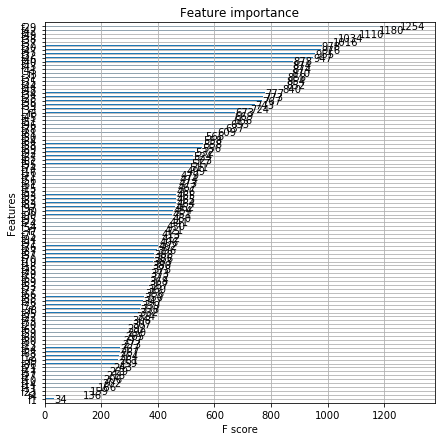

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (7.0, 7.0)
xgb.plot_importance(booster=model); plt.show()